In [1]:
import os, sys
import random, h5py
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.optimizers import SGD

#Initialize the Program
alphabet = "NACGT."
vocab_size = 6
batch_size = 1000
embedding_size = 5
time_steps = 101
category = 2

char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))


Using TensorFlow backend.


In [2]:
def reverse_complement(sequence):
    retseq = ''
    for k in range(len(sequence)-1, -1, -1):
        if sequence[k] == 'A':
            retseq = retseq + 'T'
        elif sequence[k] == 'T':
            retseq = retseq + 'A'
        elif sequence[k] == 'C':
            retseq = retseq + 'G'
        elif sequence[k] == 'G':
            retseq = retseq + 'C'
        else:
            retseq = retseq + sequence[k]

    """
    print("Revese:")
    print(sequence)
    print(retseq)
    print()
    """
    return retseq


In [3]:
file_read = open("../imgtvgene_sequence_classification/mem.txt")

source_sequence = []
target_sequence = []

vgene_tag = []
vgene_dic = {}
vgenes = 0

count = 0
max_count = 200000

line = file_read.readline()
for line in file_read:
    split = line.strip().split(" ")
    #print(split)
    
    source = [char_to_int[x] for x in split[2][1:-1]]
    source_sequence.append(source)
    
    seq = [char_to_int[x] for x in split[3][1:-1] if x in "NACGT"]
    target = source[:len(seq)]
    target_sequence.append(target)

    
    vgene_name = split[-1][1:-1].split("*")[0]
    if not vgene_name in vgene_dic:
        vgene_dic[vgene_name] = vgenes
        vgenes += 1
    vgene_tag.append(vgene_dic[vgene_name])
    
    count += 1
    
    #print(split[1], vgene_name)
    if count == max_count:
        break
    

print(len(source_sequence), len(target_sequence), len(vgene_tag))


200000 200000 200000


# Stop Index Identification

In [4]:
x_data = []
y_data = []
random = []

for k in range(max_count):
    end_ind = len(target_sequence[k]) - 1
    x_data.append(source_sequence[k][end_ind-10:end_ind+10])
    y_data.append(1)
    
    #random_ind = np.random.randint(low=0, high=st_ind-10, size=None)
    while True:
        random_ind = np.random.randint(low=0, \
                                   high=len(source_sequence[k]), \
                                   size=None)
    
        if not random_ind == end_ind:
            break
        
    x_data.append(source_sequence[k][random_ind-10:random_ind+10])
    y_data.append(0)
    random.append(random_ind)
    
x_data = np.array(x_data)
y_data = np.array(y_data)
random = np.array(random)

In [5]:
print("Source: ")
print(source_sequence[0])
print("Target: ")
print(target_sequence[0])
print("X: ")
print(x_data[0])
print("Y: ")
print(y_data[0])

Source: 
[2, 1, 3, 3, 4, 2, 1, 2, 2, 4, 4, 3, 1, 1, 3, 3, 1, 3, 4, 2, 4, 3, 3, 4, 2, 2, 4, 3, 4, 3, 2, 4, 3, 3, 4, 3, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 3, 1, 2, 2, 2, 4, 2, 1, 2, 3, 2, 4, 3, 1, 2, 2, 4, 3, 2, 1, 2, 2, 4, 4, 2, 4, 2, 4, 2, 1, 1, 2, 4, 2, 4, 2, 1, 4, 4, 2, 4, 2, 2, 1, 1, 4, 2, 2, 4, 1, 3, 1, 4, 4, 3, 3, 3, 4, 3, 4, 2, 1, 3, 2, 4, 3, 3, 1, 4, 2, 2, 3, 4, 2, 1, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 1, 1, 3, 3, 2, 2, 2, 4, 3, 3, 1, 3, 4, 3, 3, 2, 4, 4, 3, 2, 1, 2, 1, 2, 1, 4, 4, 4, 4, 4, 4, 2, 3, 1, 1, 4, 3, 1, 2, 3, 1, 3, 1, 1, 1, 4, 2, 2, 4, 1, 2, 1, 3, 2, 1, 2, 1, 4, 2, 4, 2, 4, 3, 1, 3, 3, 1, 3, 2, 1, 3, 3, 2, 4, 2, 1, 2, 2, 1, 4, 2, 4, 2, 2, 1, 1, 3, 3, 1, 2, 1, 2, 2, 4, 2, 4, 1, 1, 1, 1, 3, 2, 2, 1, 3, 3, 4, 3, 3, 4, 2, 2, 4, 3, 1, 2, 2, 2, 4, 3, 1, 2, 2, 1, 1, 4, 3, 4, 3, 3, 3, 2, 2, 2, 4, 3, 4, 3, 3, 1, 2, 1, 2, 1, 3, 2, 2, 1, 2, 1, 4, 1, 4, 4, 1, 2, 4, 3, 4, 3, 2, 1, 4, 3, 3, 3, 3, 3, 4, 2, 4, 3, 4, 2, 2, 2, 1, 3, 4, 4, 1, 1, 4, 3, 3, 3, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4, 1, 2, 

In [6]:
print("Source: ")
print(source_sequence[0])
print("Target: ")
print(target_sequence[0])
print("X: ")
print(x_data[1])
print("Y: ")
print(y_data[1], random[0])

Source: 
[2, 1, 3, 3, 4, 2, 1, 2, 2, 4, 4, 3, 1, 1, 3, 3, 1, 3, 4, 2, 4, 3, 3, 4, 2, 2, 4, 3, 4, 3, 2, 4, 3, 3, 4, 3, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 3, 1, 2, 2, 2, 4, 2, 1, 2, 3, 2, 4, 3, 1, 2, 2, 4, 3, 2, 1, 2, 2, 4, 4, 2, 4, 2, 4, 2, 1, 1, 2, 4, 2, 4, 2, 1, 4, 4, 2, 4, 2, 2, 1, 1, 4, 2, 2, 4, 1, 3, 1, 4, 4, 3, 3, 3, 4, 3, 4, 2, 1, 3, 2, 4, 3, 3, 1, 4, 2, 2, 3, 4, 2, 1, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 1, 1, 3, 3, 2, 2, 2, 4, 3, 3, 1, 3, 4, 3, 3, 2, 4, 4, 3, 2, 1, 2, 1, 2, 1, 4, 4, 4, 4, 4, 4, 2, 3, 1, 1, 4, 3, 1, 2, 3, 1, 3, 1, 1, 1, 4, 2, 2, 4, 1, 2, 1, 3, 2, 1, 2, 1, 4, 2, 4, 2, 4, 3, 1, 3, 3, 1, 3, 2, 1, 3, 3, 2, 4, 2, 1, 2, 2, 1, 4, 2, 4, 2, 2, 1, 1, 3, 3, 1, 2, 1, 2, 2, 4, 2, 4, 1, 1, 1, 1, 3, 2, 2, 1, 3, 3, 4, 3, 3, 4, 2, 2, 4, 3, 1, 2, 2, 2, 4, 3, 1, 2, 2, 1, 1, 4, 3, 4, 3, 3, 3, 2, 2, 2, 4, 3, 4, 3, 3, 1, 2, 1, 2, 1, 3, 2, 2, 1, 2, 1, 4, 1, 4, 4, 1, 2, 4, 3, 4, 3, 2, 1, 4, 3, 3, 3, 3, 3, 4, 2, 4, 3, 4, 2, 2, 2, 1, 3, 4, 4, 1, 1, 4, 3, 3, 3, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4, 1, 2, 

In [7]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

x_data = pad_sequences(x_data, maxlen=20, value=0, padding='post')

train_index = int((len(x_data) / batch_size) * 0.60 * batch_size)
eval_index = train_index + int((len(x_data) / batch_size) * 0.20 * batch_size)
test_index = eval_index + int((len(x_data) / batch_size) * 0.20 * batch_size)
print("train, eval, test = ", (train_index, eval_index, test_index))

x_train = x_data[0:train_index]
y_train = y_data[0:train_index]

x_eval = x_data[train_index:eval_index]
y_eval = y_data[train_index:eval_index]

x_test = x_data[eval_index:test_index]
y_test = y_data[eval_index:test_index]

print(x_train.shape, y_train.shape)
print(x_eval.shape, y_eval.shape)
print(x_test.shape, y_test.shape)

train, eval, test =  (240000, 320000, 400000)
(240000, 20) (240000,)
(80000, 20) (80000,)
(80000, 20) (80000,)


In [8]:
print(x_train[0], y_train[0])
print(x_train[1], y_train[1])

[4 3 2 1 4 3 3 3 3 3 4 2 4 3 4 2 2 2 1 3] 1
[1 2 4 1 2 4 1 2 4 1 2 4 1 2 1 4 3 3 1 2] 0


# Baseline Network

In [9]:
from keras.layers import Input, Embedding
from keras.layers import Reshape, Dense
from keras.models import Model

input_source = Input(shape=(20,), \
                     dtype='int32', name='main_input')
embedding = Embedding(input_dim=vocab_size, \
                      output_dim=embedding_size, \
                      input_length=20, \
                      name='embedding')(input_source)

reshape_layer = Reshape((20*embedding_size,))(embedding)

dense_layer_first = Dense(64, activation='relu', \
                        name='fstlayer')(reshape_layer)
dense_layer_first = Dropout(0.25)(dense_layer_first)

dense_layer_mid = Dense(32, activation='relu', \
                        name='midlayer')(dense_layer_first)
dense_layer_mid = Dropout(0.25)(dense_layer_mid)

dense_layer = Dense(16, activation='relu', \
                    name='finlayer')(dense_layer_mid)
dense_layer = Dropout(0.25)(dense_layer)

dense_output = Dense(1, activation='sigmoid', \
                     name='output')(dense_layer)#reshape_layer

model = Model(inputs=[input_source], outputs=[dense_output])
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 20)                0         
_________________________________________________________________
embedding (Embedding)        (None, 20, 5)             30        
_________________________________________________________________
reshape_1 (Reshape)          (None, 100)               0         
_________________________________________________________________
fstlayer (Dense)             (None, 64)                6464      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
midlayer (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
__________

In [10]:
from keras_tqdm import TQDMNotebookCallback
print('Train...')

history = model.fit(x_train, y_train, \
          validation_data=(x_eval, y_eval), \
          epochs=20, shuffle=True, batch_size=1000, \
           callbacks=[TQDMNotebookCallback()], verbose=2)
score = model.evaluate(x_test, y_test, \
                       batch_size=1000, verbose=2)
print(score)

Train...
Train on 240000 samples, validate on 80000 samples
Epoch 1/20
 - 3s - loss: 0.2855 - acc: 0.8978 - val_loss: 0.1306 - val_acc: 0.9567
Epoch 2/20
 - 2s - loss: 0.1367 - acc: 0.9578 - val_loss: 0.0922 - val_acc: 0.9708
Epoch 3/20
 - 2s - loss: 0.1132 - acc: 0.9665 - val_loss: 0.0823 - val_acc: 0.9755
Epoch 4/20
 - 2s - loss: 0.1034 - acc: 0.9699 - val_loss: 0.0771 - val_acc: 0.9767
Epoch 5/20
 - 2s - loss: 0.0961 - acc: 0.9718 - val_loss: 0.0745 - val_acc: 0.9774
Epoch 6/20
 - 2s - loss: 0.0920 - acc: 0.9730 - val_loss: 0.0712 - val_acc: 0.9781
Epoch 7/20
 - 2s - loss: 0.0893 - acc: 0.9734 - val_loss: 0.0698 - val_acc: 0.9780
Epoch 8/20
 - 2s - loss: 0.0872 - acc: 0.9741 - val_loss: 0.0684 - val_acc: 0.9782
Epoch 9/20
 - 2s - loss: 0.0847 - acc: 0.9747 - val_loss: 0.0672 - val_acc: 0.9786
Epoch 10/20
 - 2s - loss: 0.0830 - acc: 0.9749 - val_loss: 0.0659 - val_acc: 0.9789
Epoch 11/20
 - 2s - loss: 0.0820 - acc: 0.9750 - val_loss: 0.0663 - val_acc: 0.9789
Epoch 12/20
 - 2s - loss:

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


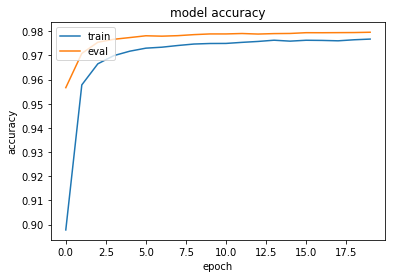

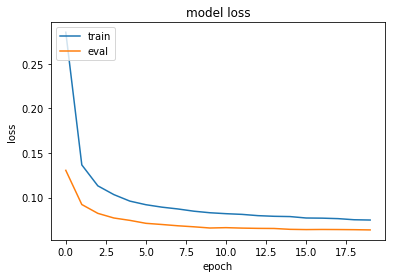

In [11]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'eval'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'eval'], loc='upper left')
plt.show()

In [12]:
print(len(x_data), len(x_data[0]), len(y_data))
x_data = np.array(x_data)
y_data = np.array(y_data)
print(x_data.shape, y_data.shape)

score = model.evaluate(x_data, y_data, \
                       batch_size=1000, verbose=2)
print(score)

400000 20 400000
(400000, 20) (400000,)
[0.0634697859082371, 0.9797400012612343]


In [13]:
from sklearn.metrics import confusion_matrix, classification_report

y_predict = model.predict(x_data)
print(classification_report(y_true=y_data, y_pred=np.round(y_predict)))
result = [int(y_predict[i] >= 0.50) for i in range(len(y_predict))]
#print(len(result), len(y_test))
print("Accuracy: ", (1.0 * np.sum(np.equal(result, y_data)) / len(y_data)))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98    200000
          1       0.98      0.98      0.98    200000

avg / total       0.98      0.98      0.98    400000

Accuracy:  0.97974


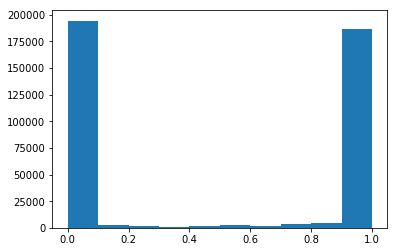

In [14]:
import matplotlib.pyplot as plt
plt.hist(y_predict)
plt.show()

# Attention Layer

In [19]:
DIM_ENC = 5 # dimension of a one-hot encoded vector (e.g., 4 (sequence) x 4 (structure) = 16)
DIM_LSTM1 = 16
DIM_LSTM2 = 16
DIM_DENSE1 = 256
DMI_DENSE2 = 128
N_CLASSES = 1

In [22]:
from keras.layers import Input
from keras.layers import Embedding
from keras.layers import Masking
from keras.layers import Reshape
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from keras.models import Model
from deepMiRGene import SoftAttention
from custom_recurrents import AttentionDecoder
from keras_tqdm import TQDMNotebookCallback

input_source = Input(shape=(20,), \
                     dtype='int32', name='main_input')
embedding = Embedding(input_dim=vocab_size, \
                      output_dim=embedding_size, \
                      input_length=20, \
                      name='embedding')(input_source)
msk = Masking(mask_value=0)(embedding)
lstm1 = LSTM(DIM_LSTM1, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)(msk)
lstm2 = LSTM(DIM_LSTM2, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)(lstm1)

att, pv = SoftAttention(lstm2)(lstm2)

do1 = Dropout(0.1)(att)
dense1 = Dense(DIM_DENSE1,activation='sigmoid')(do1)
do2 = Dropout(0.1)(dense1)
dense2 = Dense(DMI_DENSE2,activation='sigmoid')(do2)
outputs = Dense(N_CLASSES,activation='sigmoid')(dense2)

model = Model(inputs=[input_source], outputs=[outputs])
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Mask:  Tensor("masking_6/Any_1:0", shape=(?, 20), dtype=bool)
Cast:  Tensor("soft_attention_3/Cast:0", shape=(?, 20), dtype=float32)
Return PT
Vector:  Tensor("soft_attention_3/mul_1:0", shape=(?, 20), dtype=float32)
Vector:  Tensor("soft_attention_3/ExpandDims:0", shape=(?, 20, 1), dtype=float32)
Object:  Tensor("lstm_6/transpose_2:0", shape=(?, ?, 16), dtype=float32) (None, 20, 16)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 20)                0         
_________________________________________________________________
embedding (Embedding)        (None, 20, 5)             30        
_________________________________________________________________
masking_6 (Masking)          (None, 20, 5)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 20, 16)            1408      
___________________

In [23]:
from keras_tqdm import TQDMNotebookCallback
print('Train...')

history = model.fit(x_train, y_train, \
          validation_data=(x_eval, y_eval), \
          epochs=20, shuffle=True, batch_size=1000, \
           callbacks=[TQDMNotebookCallback()], verbose=2)
score = model.evaluate(x_test, y_test, \
                       batch_size=1000, verbose=2)
print(score)

Train...
Train on 240000 samples, validate on 80000 samples
Epoch 1/20
 - 31s - loss: 0.5165 - acc: 0.7150 - val_loss: 0.3044 - val_acc: 0.8855
Epoch 2/20
 - 28s - loss: 0.3134 - acc: 0.8781 - val_loss: 0.2505 - val_acc: 0.9035
Epoch 3/20
 - 28s - loss: 0.2552 - acc: 0.9001 - val_loss: 0.1895 - val_acc: 0.9391
Epoch 4/20
 - 28s - loss: 0.2116 - acc: 0.9217 - val_loss: 0.1701 - val_acc: 0.9461
Epoch 5/20
 - 28s - loss: 0.1968 - acc: 0.9314 - val_loss: 0.1590 - val_acc: 0.9512
Epoch 6/20
 - 28s - loss: 0.1870 - acc: 0.9362 - val_loss: 0.1530 - val_acc: 0.9519
Epoch 7/20
 - 28s - loss: 0.1792 - acc: 0.9389 - val_loss: 0.1441 - val_acc: 0.9528
Epoch 8/20
 - 28s - loss: 0.1722 - acc: 0.9413 - val_loss: 0.1398 - val_acc: 0.9530
Epoch 9/20
 - 28s - loss: 0.1655 - acc: 0.9432 - val_loss: 0.1328 - val_acc: 0.9563
Epoch 10/20
 - 28s - loss: 0.1587 - acc: 0.9455 - val_loss: 0.1267 - val_acc: 0.9585
Epoch 11/20
 - 28s - loss: 0.1522 - acc: 0.9483 - val_loss: 0.1257 - val_acc: 0.9598
Epoch 12/20
 -

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


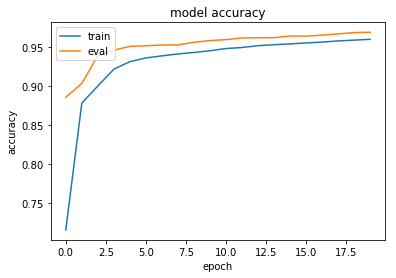

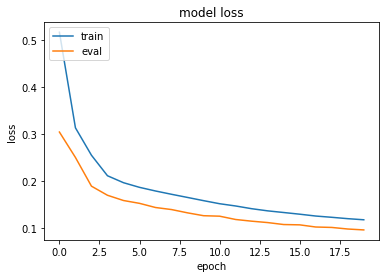

In [24]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'eval'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'eval'], loc='upper left')
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

y_predict = model.predict(x_data)
print(classification_report(y_true=y_data, y_pred=np.round(y_predict)))
result = [int(y_predict[i] >= 0.50) for i in range(len(y_predict))]
#print(len(result), len(y_test))
print("Accuracy: ", (1.0 * np.sum(np.equal(result, y_data)) / len(y_data)))

             precision    recall  f1-score   support

          0       0.96      0.97      0.97    200000
          1       0.97      0.96      0.97    200000

avg / total       0.97      0.97      0.97    400000

Accuracy:  0.9675125


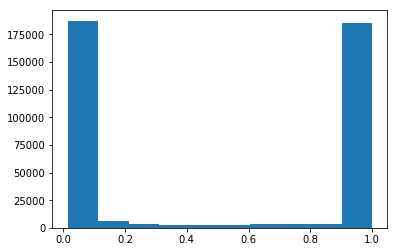

In [26]:
import matplotlib.pyplot as plt
plt.hist(y_predict)
plt.show()

# Why Dense Layer Better Than RNN

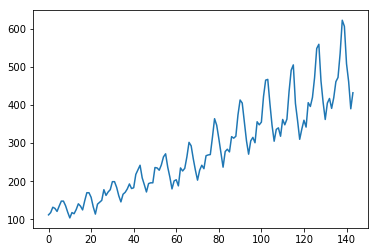

In [34]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

Data:  (90, 5) (90,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 16)                96        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
Train Score: 21.36 RMSE
Test Score: 47.19 RMSE


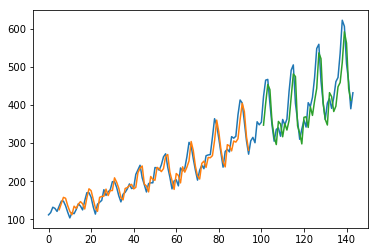

In [39]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print("Data: ", trainX.shape, trainY.shape)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(Flatten(input_shape=(1, look_back)))
model.add(Dense(16))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)
model.summary()
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Data:  (90, 5) (90,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 4)                 160       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 5         
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________
Train Score: 22.28 RMSE
Test Score: 55.89 RMSE


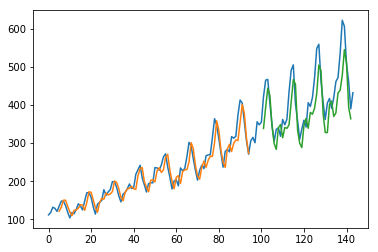

In [40]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print("Data: ", trainX.shape, trainY.shape)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)
model.summary()
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()